In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. On charge le fichier 
df = pd.read_csv('HR_Analytics_Structure_Complet.csv')
# 2. On sélectionne nos colonnes stratégiques
features = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'JobLevel']
X = df[features]
# 3. On crée le "Scaler" (l'outil de mise à l'échelle)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
print("--- Aperçu des données standardisées (Etape 1 terminée) ---")
print(X_scaled_df.head())

--- Aperçu des données standardisées (Etape 1 terminée) ---
        Age  MonthlyIncome  TotalWorkingYears  YearsAtCompany  JobLevel
0  0.446350      -0.108350          -0.421642       -0.164613 -0.057788
1  1.322365      -0.291719          -0.164511        0.488508 -0.057788
2  0.008343      -0.937654          -0.550208       -1.144294 -0.961486
3 -0.429664      -0.763634          -0.421642        0.161947 -0.961486
4 -1.086676      -0.644858          -0.678774       -0.817734 -0.961486


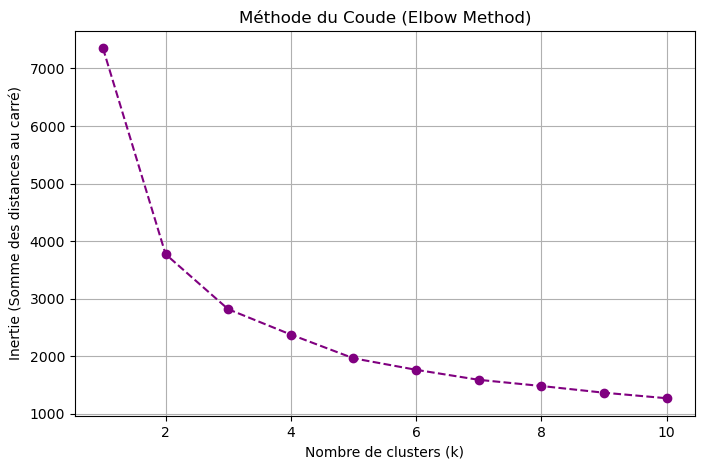

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. On crée une liste vide pour stocker les scores d'inertie
inertia = []

# 2. On crée une boucle pour tester k de 1 à 10
for k in range(1, 11):
    # Initialisation de l'algorithme
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    # Entraînement sur les données standardisées
    kmeans.fit(X_scaled)
    
    # On enregistre l'inertie (le score de compacité)
    inertia.append(kmeans.inertia_)

# 3. Affichage du graphique
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', color='purple', linestyle='--')
plt.title('Méthode du Coude (Elbow Method)')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie (Somme des distances au carré)')
plt.grid(True)
plt.show()

  Où se trouve la réponse ? 
  (Le "Coude")Le "graphique du coude" s'appelle ainsi car on cherche la cassure dans la courbe, comme l'articulation d'un bras :La chute brutale :
 
  Entre k=1 et k=3 l'inertie tombe très vite. Cela signifie que diviser les employés en 2 ou 3 groupes apporte énormément d'informations nouvelles et de précision.
  
  Après k=4 ou k=5, la courbe devient presque plate. Cela signifie qu'ajouter un 5ème ou 6ème groupe n'améliore plus vraiment la qualité de ta segmentation. Tu ne fais que couper des groupes déjà cohérents en petits morceaux inutiles.

In [12]:
# 1. nombre de clusters choisi K=3
k_final = 3
kmeans_final = KMeans(n_clusters=k_final, random_state=42, n_init=10)

# 2. On entraîne le modèle et on récupère les étiquettes (labels)
clusters = kmeans_final.fit_predict(X_scaled)

# 3. On ajoute la colonne 'Cluster' au DataFrame d'origine (df)
# Pour pouvoir analyser les vraies valeurs (pas les valeurs standardisées)
df['Cluster'] = clusters

# 4. Analyse des profils : calcul de la moyenne pour chaque variable par cluster
profils = df.groupby('Cluster')[features].mean()

print("\n--- CARACTÉRISTIQUES MOYENNES PAR CLUSTER ---")
print(profils)

# 5. On compte combien d'employés il y a dans chaque groupe
print("\n--- RÉPARTITION DES EMPLOYÉS ---")
print(df['Cluster'].value_counts())


--- CARACTÉRISTIQUES MOYENNES PAR CLUSTER ---
               Age  MonthlyIncome  TotalWorkingYears  YearsAtCompany  JobLevel
Cluster                                                                       
0        39.699377    6412.749221          11.967290        7.476636  2.155763
1        47.817352   15542.502283          25.789954       14.748858  4.100457
2        30.080460    3347.316913           5.336617        3.730706  1.234811

--- RÉPARTITION DES EMPLOYÉS ---
Cluster
0    642
2    609
1    219
Name: count, dtype: int64


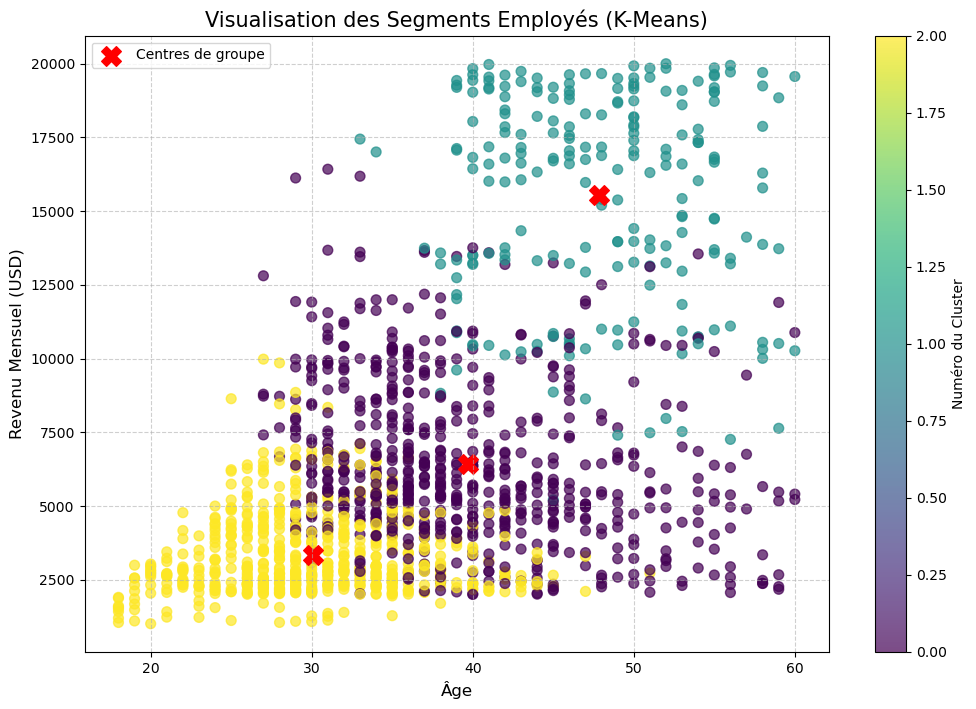

In [14]:
# 1. Configuration du style graphique
plt.figure(figsize=(12, 8))

# 2. Création du nuage de points
# On utilise l'Âge en X et le Revenu en Y
# 'c' définit la couleur par cluster, 'cmap' est la palette de couleurs
scatter = plt.scatter(df['Age'], df['MonthlyIncome'], 
            c=df['Cluster'], cmap='viridis', s=50, alpha=0.7)

# 3. Ajout des centres de gravité (Centroïdes)
# On doit d'abord calculer les coordonnées moyennes des centres sur les données brutes
centroids = df.groupby('Cluster')[['Age', 'MonthlyIncome']].mean()
plt.scatter(centroids['Age'], centroids['MonthlyIncome'], 
            marker='X', s=200, color='red', label='Centres de groupe')

# 4. Habillage du graphique
plt.title('Visualisation des Segments Employés (K-Means)', fontsize=15)
plt.xlabel('Âge', fontsize=12)
plt.ylabel('Revenu Mensuel (USD)', fontsize=12)
plt.colorbar(scatter, label='Numéro du Cluster')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# 5. Affichage et sauvegarde
plt.savefig('visualisation_clusters_2d.png')
plt.show()